MiMIC-III Clinical Dataset basic exploration
- 11/13/2025, Kenna McRae

what does this code do?
- imports "PATIENTS" AND "ADMISSIONS" tables
- formats data for plotting
- plots some aspects of data in a single 6-subplot figure

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [6]:
# data folder
#dir = '/content/drive/MyDrive/fall2025/csci5526/project/mimic-iii-clinical-database-1.4' # Kenna
dir = '/content/drive/MyDrive/mimic-iii-clinical-database-1.4' #yashasvi

In [7]:
# load data
patients = pd.read_csv(dir + '/PATIENTS.csv.gz')
admissions = pd.read_csv(dir + '/ADMISSIONS.csv.gz')

In [8]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [9]:
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [10]:
# create features for plotting

# plotting deaths: use "patients" df
DOD_HOSP_total = patients['DOD_HOSP'].count()
DOD_total = patients['DOD'].count()
alive_total = patients['EXPIRE_FLAG'].count() - DOD_total

# plotting age: using "admissions" and "patients" df
# get admit date
admit_date = pd.to_datetime(admissions['ADMITTIME'])
age_df = pd.DataFrame()
age_df['SUBJECT_ID'] = admissions['SUBJECT_ID']
# get DOB
dob_map = patients.set_index('SUBJECT_ID')['DOB']
age_df['DOB'] = age_df['SUBJECT_ID'].map(dob_map)
DOB = pd.to_datetime(age_df['DOB'])
# calculate age
admit_year = admit_date.dt.year
admit_month = admit_date.dt.month
admit_day = admit_date.dt.day
dob_year = DOB.dt.year
dob_month = DOB.dt.month
dob_day = DOB.dt.day
age = admit_year - dob_year
# Adjust age if needed
age_adjustment = (admit_month < dob_month) | ((admit_month == dob_month) & (admit_day < dob_day))
age = age - age_adjustment.astype(int)
age_df['AGE'] = age

# Most common diagnoses
top_diagnoses = admissions['DIAGNOSIS'].copy().value_counts().head(10)
# Rename the specific index label
top_diagnoses = top_diagnoses.rename(index={r'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA': 'CORONARY ARTERY BYPASS GRAFT'})

In [11]:
top_diagnoses

,count
DIAGNOSIS,
NEWBORN,7823
PNEUMONIA,1566
SEPSIS,1184
CONGESTIVE HEART FAILURE,928
CORONARY ARTERY DISEASE,840
CHEST PAIN,778
INTRACRANIAL HEMORRHAGE,713
ALTERED MENTAL STATUS,712
GASTROINTESTINAL BLEED,686


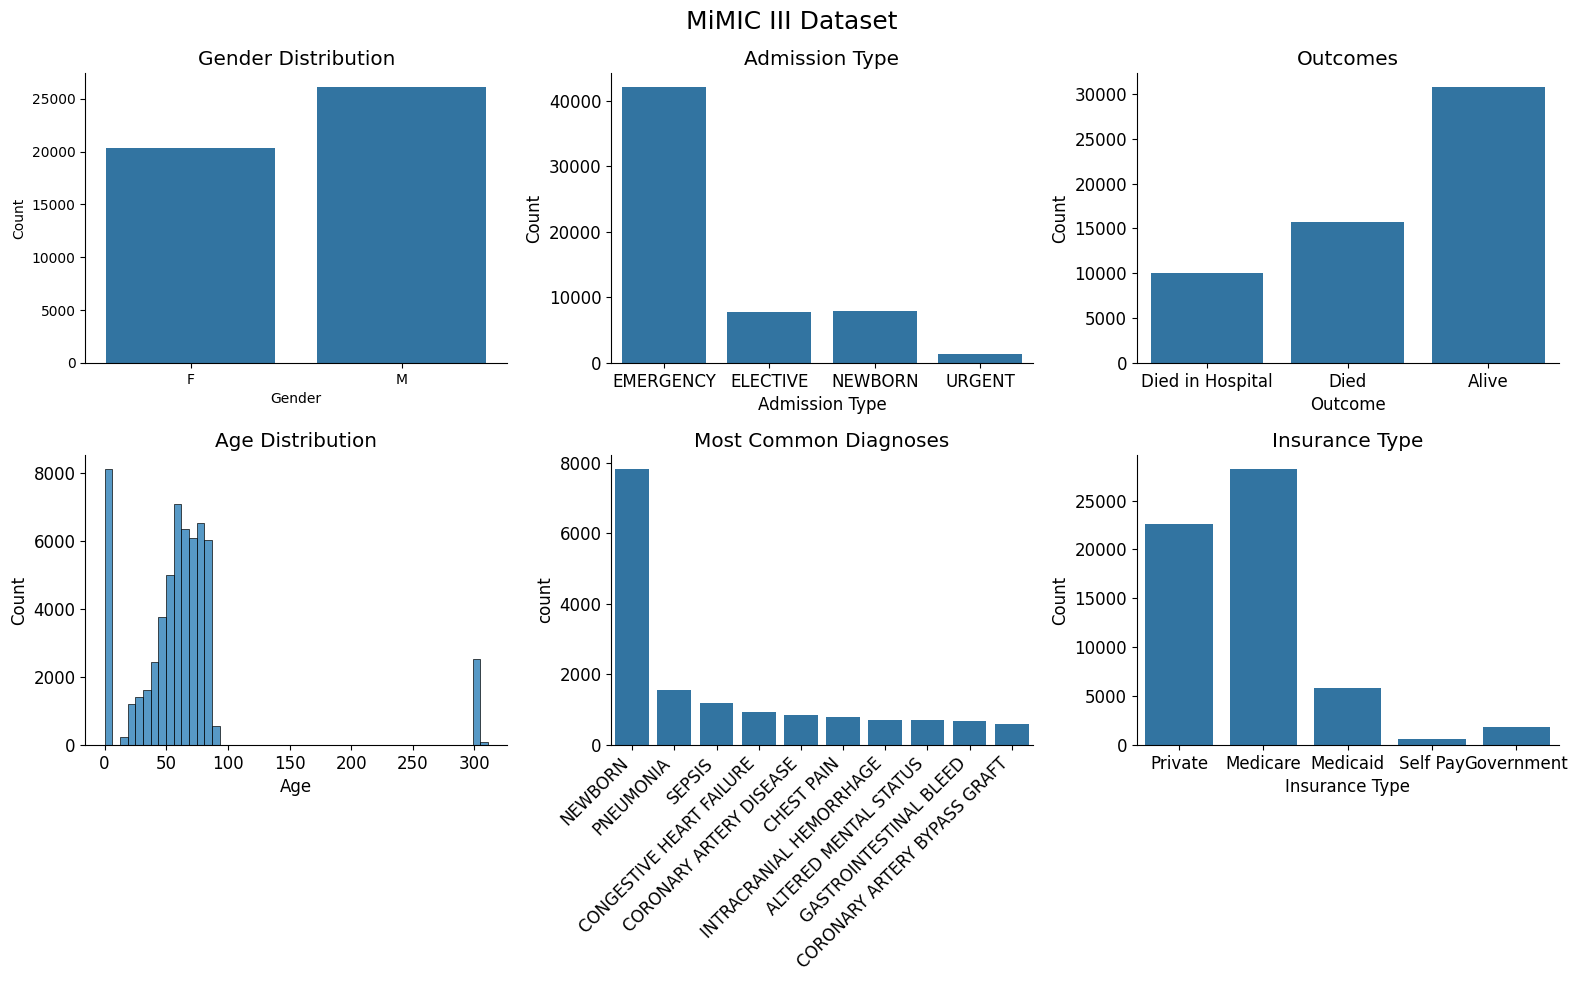

In [12]:
# plot features
plt.figure(figsize=(16,10))
font = {'size': 12}

# Gender
plt.subplot(2,3,1)
sns.countplot(x='GENDER', data=patients)
plt.xlabel('Gender',)
plt.ylabel('Count')
plt.rc('font', **font)
sns.despine()
plt.title('Gender Distribution')

# admission type
plt.subplot(2,3,2)
sns.countplot(x='ADMISSION_TYPE', data=admissions)
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.rc('font', **font)
sns.despine()
plt.title('Admission Type')

# Died in hospital?
plt.subplot(2,3,3)
sns.barplot(x=['Died in Hospital', 'Died', 'Alive'], y=[DOD_HOSP_total, DOD_total, alive_total])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.rc('font', **font)
sns.despine()
plt.title('Outcomes')

# age: using "Admittance" and "Patients"
plt.subplot(2,3,4)
sns.histplot(age_df['AGE'], bins=50)
plt.xlabel('Age')
plt.rc('font', **font)
sns.despine()
plt.title('Age Distribution')

# 10 most common diagnoses
plt.subplot(2,3,5)
sns.barplot(x=top_diagnoses.index, y=top_diagnoses)
plt.rc('font', **font)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
sns.despine()
plt.title('Most Common Diagnoses')

# Insurance Type
plt.subplot(2,3,6)
sns.countplot(x='INSURANCE', data=admissions)
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.rc('font', **font)
sns.despine()
plt.title('Insurance Type')

plt.suptitle('MiMIC III Dataset', fontsize=18)
plt.tight_layout()
plt.show()

ICU vs Non-ICU counts:
icu_label
ICU admission        57786
Non-ICU admission     1190
Name: count, dtype: int64


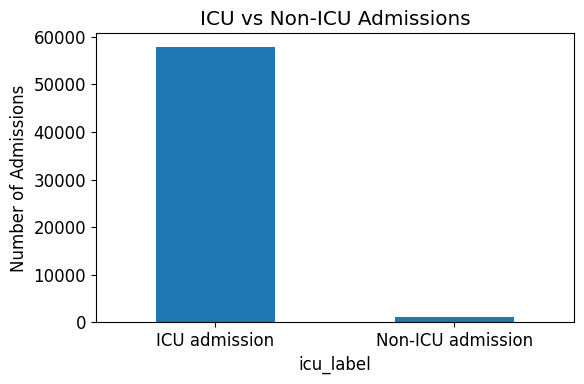

In [13]:
# load ICU stays table
icustays = pd.read_csv(dir + '/ICUSTAYS.csv.gz')

icustays.head()

# all hospital admissions that ever had an ICU stay
icu_hadm_ids = icustays['HADM_ID'].dropna().unique()

# create binary label on admissions dataframe
admissions['icu_label'] = admissions['HADM_ID'].isin(icu_hadm_ids).astype(int)

# sanity check
admissions[['HADM_ID', 'icu_label']].head()

icu_counts = admissions['icu_label'].value_counts().rename({
    0: "Non-ICU admission",
    1: "ICU admission"
})

print("ICU vs Non-ICU counts:")
print(icu_counts)

plt.figure(figsize=(6,4))

icu_counts.plot(kind='bar')
plt.title('ICU vs Non-ICU Admissions')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()